In [20]:
import csv
import pandas as pd

In [21]:
!pip install tweet-preprocessor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [25]:
import preprocessor as p
from textblob import TextBlob
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize
import regex as re
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
import datetime as dt

In [26]:
data = pd.read_csv('/content/wibu (1).csv')
data.isnull().sum()

Datetime    0
Tweet Id    0
Text        0
Username    0
Like        0
dtype: int64

In [27]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers

    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower() 
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text) 
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered 
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    return text

def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence


In [28]:
data['text_clean'] = data['Text'].apply(cleaningText)
data['text_clean'] = data['text_clean'].apply(casefoldingText)
data.drop(['Text'], axis = 1, inplace = True)

data['text_preprocessed'] = data['text_clean'].apply(tokenizingText)
data['text_preprocessed'] = data['text_preprocessed'].apply(filteringText)
#data['text_preprocessed'] = data['text_preprocessed'].apply(stemmingText)

# drop duplicates/spams data
data.drop_duplicates(subset = 'text_clean', inplace = True)

In [29]:
# Loads lexicon positive and negative data
lexicon_positive = dict()
import csv
with open('lexicon_positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('lexicon_negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
        
# Function to determine sentiment polarity of tweets        
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
    return score, polarity

In [30]:
# Results from determine sentiment polarity of tweets

results = data['text_preprocessed'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
data['polarity_score'] = results[0]
data['polarity'] = results[1]
print(data['polarity'].value_counts())

# Export to csv file
data.to_csv(r'cleanpolarity.csv', index = False, header = True,index_label=None)

data

negative    7566
positive    6195
neutral     6037
Name: polarity, dtype: int64


,Datetime,Tweet Id,Username,Like,text_clean,text_preprocessed,polarity_score,polarity
0,2022-12-27 23:59:45+00:00,1607889002040000512,kjkpdf,0,wibu sekali ya pak,"[wibu, ya]",0,neutral
1,2022-12-27 23:59:26+00:00,1607888920116879362,killingthesides,0,joo bismillah cowo wibu,"[joo, bismillah, cowo, wibu]",4,positive
2,2022-12-27 23:59:02+00:00,1607888821429100546,epiidesu,0,plis gua nyari au yang anak haikyuu jadi bocil...,"[plis, gua, nyari, au, anak, haikyuu, bocil, a...",-3,negative
3,2022-12-27 23:50:19+00:00,1607886627111854080,SlayerWibu,0,dan yang lo harus tau gw sayang banget sama lo...,"[lo, tau, gw, sayang, banget, lo, sampe, lo, u...",-8,negative
4,2022-12-27 23:49:39+00:00,1607886458165293057,ai555hi,0,oh iya wibu semua 😮,"[oh, iya, wibu, 😮]",0,neutral
...,...,...,...,...,...,...,...,...
21082,2022-12-26 13:40:10+00:00,1607370689572655104,lovingyukim,0,tidur smpe jadi anime,"[tidur, smpe, anime]",0,neutral
21083,2022-12-26 13:39:55+00:00,1607370627094310916,yukarikanagawa,1,yyantto anime lama judulnya cardcaptor sakura ...,"[yyantto, anime, judulnya, cardcaptor, sakura,...",-6,negative
21084,2022-12-26 13:39:53+00:00,1607370616797270018,hybe_girl,0,ide yg menarique kids saatnya kembali menjadi ...,"[ide, yg, menarique, kids, anime]",0,neutral
21085,2022-12-26 13:39:50+00:00,1607370604927422469,aku_unko,0,making a circle list is so mendokusai ya tapi ...,"[making, a, circle, list, is, so, mendokusai, ...",-3,negative


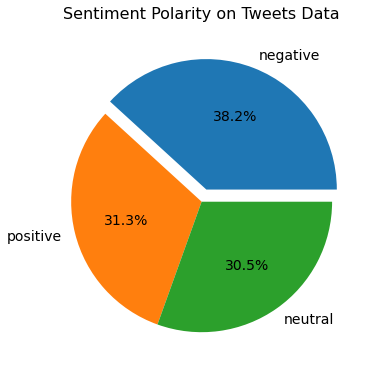

In [31]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in data['polarity'].value_counts()]
labels = list(data['polarity'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Tweets Data', fontsize = 16, pad = 20)
plt.show()

In [41]:
data['Datetime'] = data.Datetime.dt.strftime('%Y-%m-%d')

In [42]:
data.groupby(['Datetime']).count()

,Tweet Id,Username,Like,text_clean,text_preprocessed,polarity_score,polarity
Datetime,,,,,,,
2019-12-29,1,1,1,1,1,1,1
2020-01-10,2,2,2,2,2,2,2
2020-01-12,1,1,1,1,1,1,1
2020-01-15,1,1,1,1,1,1,1
2020-01-16,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...
2022-12-23,143,143,143,143,143,143,143
2022-12-24,434,434,434,434,434,434,434
2022-12-25,1547,1547,1547,1547,1547,1547,1547


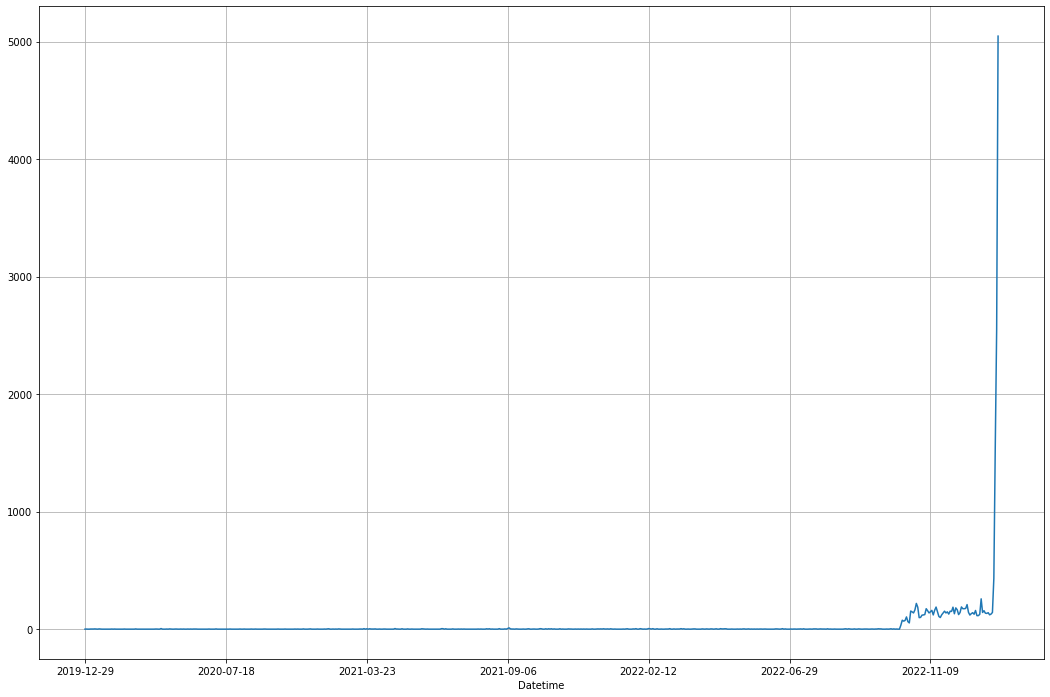

In [43]:
reactions = data.groupby(['Datetime']).count()
ax = reactions.text_clean.plot(figsize=(18,12))
ax.xaxis.grid(True)
ax.yaxis.grid(True)

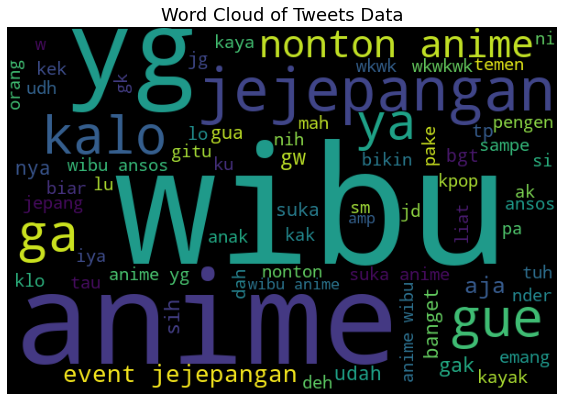

In [44]:
list_words=''
for tweet in data['text_preprocessed']:
    for word in tweet:
        list_words += ' '+(word)
        
wordcloud = WordCloud(width = 600, height = 400, background_color = 'black', min_font_size = 10).generate(list_words)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Word Cloud of Tweets Data ', fontsize = 18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

In [45]:
def words_with_sentiment(text):
    positive_words=[]
    negative_words=[]
    for word in text:
        score_pos = 0
        score_neg = 0
        if (word in lexicon_positive):
            score_pos = lexicon_positive[word]
        if (word in lexicon_negative):
            score_neg = lexicon_negative[word]
        
        if (score_pos + score_neg > 0):
            positive_words.append(word)
        elif (score_pos + score_neg < 0):
            negative_words.append(word)
            
    return positive_words, negative_words

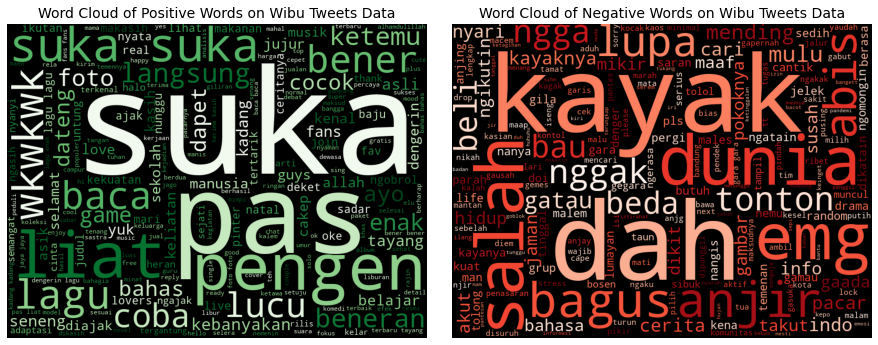

In [50]:
# Visualize positive and negative word cloud

sentiment_words = data['text_preprocessed'].apply(words_with_sentiment)
sentiment_words = list(zip(*sentiment_words))
positive_words = sentiment_words[0]
negative_words = sentiment_words[1]

fig, ax = plt.subplots(1, 2,figsize = (12, 10))
list_words_postive=''
for row_word in positive_words:
    for word in row_word:
        list_words_postive += ' '+(word)
wordcloud_positive = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Greens'
                               , min_font_size = 10).generate(list_words_postive)
ax[0].set_title('Word Cloud of Positive Words on Wibu Tweets Data', fontsize = 14)
ax[0].grid(False)
ax[0].imshow((wordcloud_positive))
fig.tight_layout(pad=0)
ax[0].axis('off')

list_words_negative=''
for row_word in negative_words:
    for word in row_word:
        list_words_negative += ' '+(word)
wordcloud_negative = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Reds'
                               , min_font_size = 10).generate(list_words_negative)
ax[1].set_title('Word Cloud of Negative Words on Wibu Tweets Data', fontsize = 14)
ax[1].grid(False)
ax[1].imshow((wordcloud_negative))
fig.tight_layout(pad=0)
ax[1].axis('off')

plt.show()

In [47]:
pd.set_option('display.max_colwidth', 3000)
positive_tweets = data[data['polarity'] == 'positive']
positive_tweets = positive_tweets[['text_clean', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=False).reset_index(drop = True)
positive_tweets.index += 1
positive_tweets[0:10]

,text_clean,polarity_score,polarity
1,interest musik yg energized kadang musik klasik kadang rock kadang orchestra kadang jejepangan kadang pop bahasa inggris kadang balada kadang country kadang tulus tapi ga dengerin kpop krna ga paham arti liriknya cuma kadang suka instrumentalnya aja yg terkesan trendi,48,positive
2,versi serius ya allah mudahan jodoh ku ganteng tinggi sholeh rajin sholat suka mengaji rajin bekerjasuka anime suka kpop suka thailand mau bekerja sama buat ngurus pekerjaan rumah tangga lucu imut humoris pinter masak main genshin tidak pelitpenyayang aamiin,27,positive
3,good listener udah pasti saya suka dengerin orang cerita ke saya ngga harus halhal yang complicated sesimple nyeritain harinya aja saya udah seneng selain itu saya suka baca buku dengerin lagu nonton filmanime atau baca mangamanhwa kadangkadang main game di plato,23,positive
4,happy birthday rarirurero rarey azzahra elfreda arianti wibu cakep semoga panjang umur sehat selalu makin sayang ortu trs bisa ketemu anime versi manusia hehehehehhehehehehehheheh makin debest deh intinyaaa lopyu somakkkk 🤍🤍🤍🥳 kay,22,positive
5,ya allah jujur gw capek baca jurnal² bahasa alien read english ini pengen nonton anime aja ya allah kenapa proposal ini gabisa mengerjakan dirinya sendiri ya allah hambah mau jadi anime aja ya allah,22,positive
6,random bgt si gue😭 mood awal pengen dengerin di bawah trs seketika pengen dengerin rap trs ganti lg pgn dengerin pop english ganti lg moodnya pengen dengerin jpop ma anime ost ganti lagi pengen dengerin indo ganti lg pgn dengerin arab ma maher zain😭,22,positive
7,pas sma ak suka cowo dia wibu trs tinggi cakep wangi ak suka pas pertama liat pas ak panit sblmnya ak egk wibu grgr dia ak suka anime trs yaudah ak berusaha buat nonton anime biar ada topik kan trs pas confess make kata² dia cmn mau temenan aja wqwq alias nt👎🏼,22,positive
8,ini tuh kek aku cinta dio terdengar wibu halu ih jijay aku menyukai seseorang yang memiliki pandangan luas mengenai mengenali diri sendiri sebagai pribadi yang bukan manusia sangat filosifis wah pasti suka sama orang pinter ya wih panutan pengetahuan tuh,21,positive
9,testi liat member chan cakep max gile idungnya mancung bgt beneran kek bule lino anime no debat changbin beneran gede bgt badannya hj walaupun rambut lu kek ank sd tp ttp keren abis han wibu keren felix suara nya beneran ngebass bgt seungmin mong lucu bgt in lucu jg baby bread,21,positive
10,halo mau nugas bareng sekalian sposess ga tapi tenang aja nanti kita tetep bisa cerita soal si dia itu kok tenang aja kebetulan juga saya pengoleksi lagu lagu galau baik indo west kpop maupun jejepangan yuk mari chat si abah dulu see ya,21,positive


In [48]:
pd.set_option('display.max_colwidth', 3000)
negative_tweets = data[data['polarity'] == 'negative']
negative_tweets = negative_tweets[['text_clean', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=True)[0:10].reset_index(drop = True)
negative_tweets.index += 1
negative_tweets[0:10]

,text_clean,polarity_score,polarity
1,kaos black clover dual printing kaos anime japan kaos manga otaku kaos distro wibu kaos anak kaos de 🔗 kaos anime kaos black clover kaos asta logo kaos distro kaos pria 🔗,-44,negative
2,oang tua selalu teriak teriak tentang anak yang durhaka ke orang tua tapi mereka gapernah buka mata tentang orang tua yang durhaka ke anak,-31,negative
3,orang mah ya mam di kedai jejepangan tuh bahas obrolan apa gituini aku ma manda malah cerita horor dari film horor jadul kejadian horor yg pernah dialami sampe ngakak bangetkekanjir apaansi ni obrolan gajelas bgt tbtb bahas hantu 😂😂😂,-31,negative
4,udah gada argumen kan kartu as lo cuma stalk akunnya trs dicari celahnya padahal suka korea sm anime ya bukan hal yang buruk emang goblokk udah sumbu pendek makin bloon goblok tolol pantes semua orang against lu lagian lu juga wibu anjing,-29,negative
5,halah bodo amat lah mau dikatain kpoper suka plastik alay mau dikatain wibu wibu ansos bau bawang bodo amat gua mah omongan lu ga bakal merubah gua jadi ga suka ke duanya,-29,negative
6,yang gw tangkep dari game ini tuh mereka kayak di lorong labirin gitu kan dikejar kejar singa mungkin karena itu lorong sempit gelap dan rumit kayak labirin bisa sangat bikin kondisi waras orang terganggu ya cuman si king ini napain disana fungsinya berarti 😭,-29,negative
7,kalau gak salah wibu itu dianggep udah ansos banget gapernah keluar kamar ya tentu itu bikin mereka jarang mandi saking bau nya karena jarang mandi makanya disebut bau bawang karena baunya menyengat kayak bau bawang setauku aja sih lupa darimana ini dapetnya,-28,negative
8,agak nyesel pcaran ama cwk wibu 😭😭😭😭 ffckkk meme nya jelek jelek 😭😭😭 bawaannya emosi terus 😭😭 lagi ngobrol serius tibatiba ngirim meme anime jelek ga nyambung 😭😭😭🤒🖕🏻🖕🏻🖕🏻 pokoknya ga lagi deh yah 😭😭😭😭,-28,negative
9,makanya ini orang sekali mengkhianati ga akan gua kasih kesempatan lagi biar perasaan yang sudah dibangun itu mati inget jaga diri dunia jejepangan itu sekarang suram walau dari dulu emang suram gua udah pusing mikirin ayam jadi jangan bikin tambah pusing ya,-28,negative
10,maaf ya gua gak da maksud buat marah gua gak marah gua cuma ngelurusin aja biar gak da yg salah paham soal anime meski gua bukan wibu jg karna masih pada bingung bedain anime sama kartun gua gak marah asli emang typing gua yg datar maaf jd salah paham gua gak marah serius,-28,negative


In [51]:
pd.set_option('display.max_colwidth', 3000)
neutral_tweets = data[data['polarity'] == 'neutral']
neutral_tweets = neutral_tweets[['text_clean', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=True)[0:10].reset_index(drop = True)
neutral_tweets.index += 1
neutral_tweets[0:10]

,text_clean,polarity_score,polarity
1,wibu sekali ya pak,0,neutral
2,biar ga terlalu wibu tapi tetap ada unsur anime,0,neutral
3,nonton anime bukan berarti wibu,0,neutral
4,ywwa yang wibu wibu aja denji tuh character anime cio wkwkwkwk,0,neutral
5,anime yang kebetulan peran sy jadi wibu kenalan sama shinobuku,0,neutral
6,wibu jadi anime sekalian,0,neutral
7,akak wibu stiker di hape nya anime 👏,0,neutral
8,wibu satu ini kena angin jepang langsung berubah jadi anime 😾,0,neutral
9,niat buat snapgram anime biar ngira aku wibu trus pada ilfeel malah ada yg deketin🙂,0,neutral
10,ngakakak wibu spek anime,0,neutral
